In [1]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
import random
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import matplotlib as mpl

W1101 16:17:54.895610 140702025889536 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
NAME = '_TaxH_'
DIR = './Figure/'

In [3]:
name_basic = pd.read_pickle('../BasicFeature/Normalize_TaxH_basic.pickle')

name_label = pd.read_pickle('./TaxH_label.pickle')

In [4]:
positive_label = name_label[name_label['label']==1]
negative_label = name_label[name_label['label']==0]
print('positive', positive_label.shape)
print('negative', negative_label.shape)

positive (13420, 1)
negative (68497, 1)


In [5]:
positive_nsr = positive_label.index.values
negative_nsr = negative_label.index.values
positive_idx = np.random.choice(positive_nsr, 1000, replace=False)
negative_idx = np.random.choice(negative_nsr, 1000, replace=False)

In [6]:
data = pd.concat([name_basic.loc[positive_idx], name_basic.loc[negative_idx]], axis=0)
label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)

In [7]:
data
# data.fillna(method = 'ffill', axis = 0, inplace=True)
data.isnull().sum().sum()

0

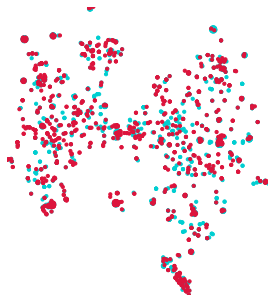

In [8]:
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(data.values)
te = time.time()
label[label['label']==1]= '#00CED1'
label[label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
# ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=label.values, s=1, cmap=plt.get_cmap('tab20'))
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
# ax.set_xlim(-100, 100)
# ax.set_ylim(-100, 100)
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'Basic.pdf', bbox_inches = 'tight')
plt.show()

total time 14.60183334350586


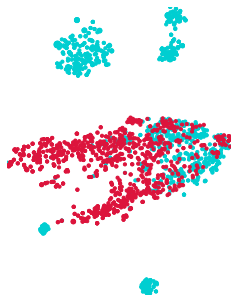

In [9]:
# PnCGCN
dp_gcn_feature = pd.read_pickle('all_PnCGCN_TaxH.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'DP_GCN.pdf')
plt.show()

total time 15.80997920036316


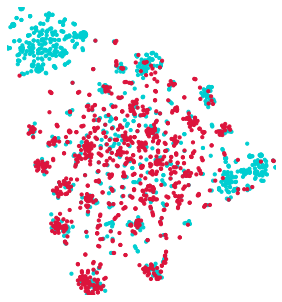

In [10]:
# GCN
dp_gcn_feature = pd.read_pickle('all_GCN_TaxH.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'GCN.pdf')
plt.show()

total time 15.036307573318481


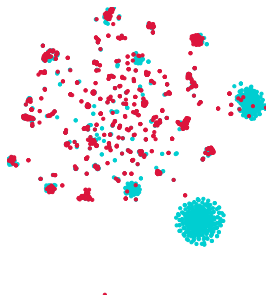

In [11]:
# graph attention 

dp_gcn_feature = pd.read_pickle('all_graph_attention_TaxH.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'graphAttention.pdf')
plt.show()

total time 12.566116094589233


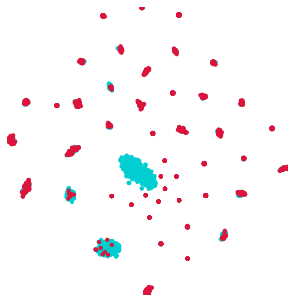

In [12]:
# all_netra_Zhejiang.pickle
dp_gcn_feature = pd.read_pickle('all_netra_TaxH.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'netra.pdf')
plt.show()

total time 15.46703553199768


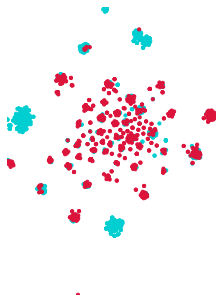

In [13]:
# all_sdne_Zhejiang.pickle
dp_gcn_feature = pd.read_pickle('all_sdne_TaxH.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'sdne.pdf')
plt.show()

total time 16.93022608757019


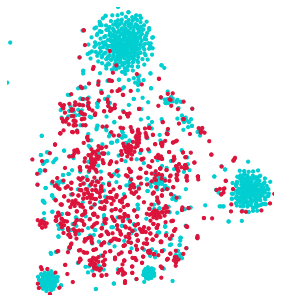

In [14]:
# all_walklets_Zhejiang.pickle
dp_gcn_feature = pd.read_pickle('all_walklets_TaxH.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'walklets.pdf')
plt.show()

total time 18.85144805908203


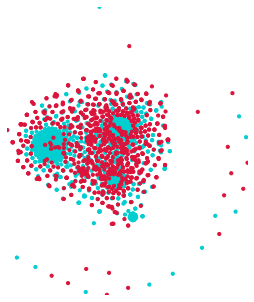

In [15]:
# all_deepwalk_TaxH.pickle
dp_gcn_feature = pd.read_pickle('all_deepwalk_TaxH.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'deepwalk.pdf')
plt.show()

total time 15.07379150390625


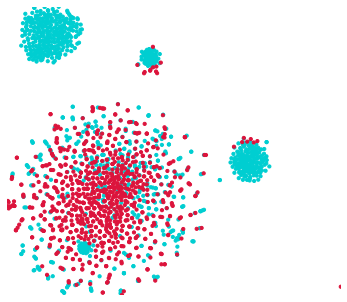

In [17]:
# all_node2vec_TaxH.pickle
dp_gcn_feature = pd.read_pickle('all_node2vec_TaxH.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'node2vec.pdf')
plt.show()

total time 14.292007446289062


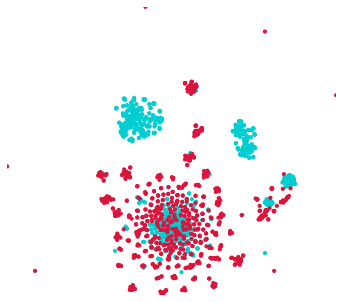

In [20]:
# all_GraRep_TaxH.pickle
dp_gcn_feature = pd.read_pickle('all_GraRep_TaxH.pickle')
all_data = pd.concat([dp_gcn_feature.loc[positive_idx], dp_gcn_feature.loc[negative_idx]], axis=0)
all_label = pd.concat([name_label.loc[positive_idx], name_label.loc[negative_idx]], axis=0)
ts = time.time()
x2_sample = TSNE(n_components=2).fit_transform(all_data)
te = time.time()
print('total time {}'.format(te-ts))
all_label[all_label['label']==1]= '#00CED1'
all_label[all_label['label']==0]= '#DC143C'
fig, ax = plt.subplots(1, 1)
ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=all_label.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
ax.set_aspect('equal')
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig(DIR + NAME + 'GraRep.pdf')
plt.show()